# Дисциплина Проектный практикум

# Проект: Прогнозирование одобрения кредита (Loan Approval Prediction)

# Команда:

## 1. Богданова Наталья
## 2. Векслер Александр
## 3. Заичкин Артём
## 4. Ставриянов Григорий
## 5. Степанов Сергей

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Описание задания

Проведите предварительную обработку данных для дальнейшего анализа (используйте материалы Вебинара «Предварительная обработка данных»):

Загрузить данные проекта с сайта кегл в среду разработки

Провести предварительный анализ данных (без визуализации)

Выявить пропуски в данных

Принять решение по обработке найденных пропусков

Выявить категориальные признаки

Преобразовать категориальные данные

Нормировать данные выбранным методом

# Загрузить данные проекта с сайта Kaggle в среду разработки
https://www.kaggle.com/competitions/playground-series-s4e10/data?select=train.csv

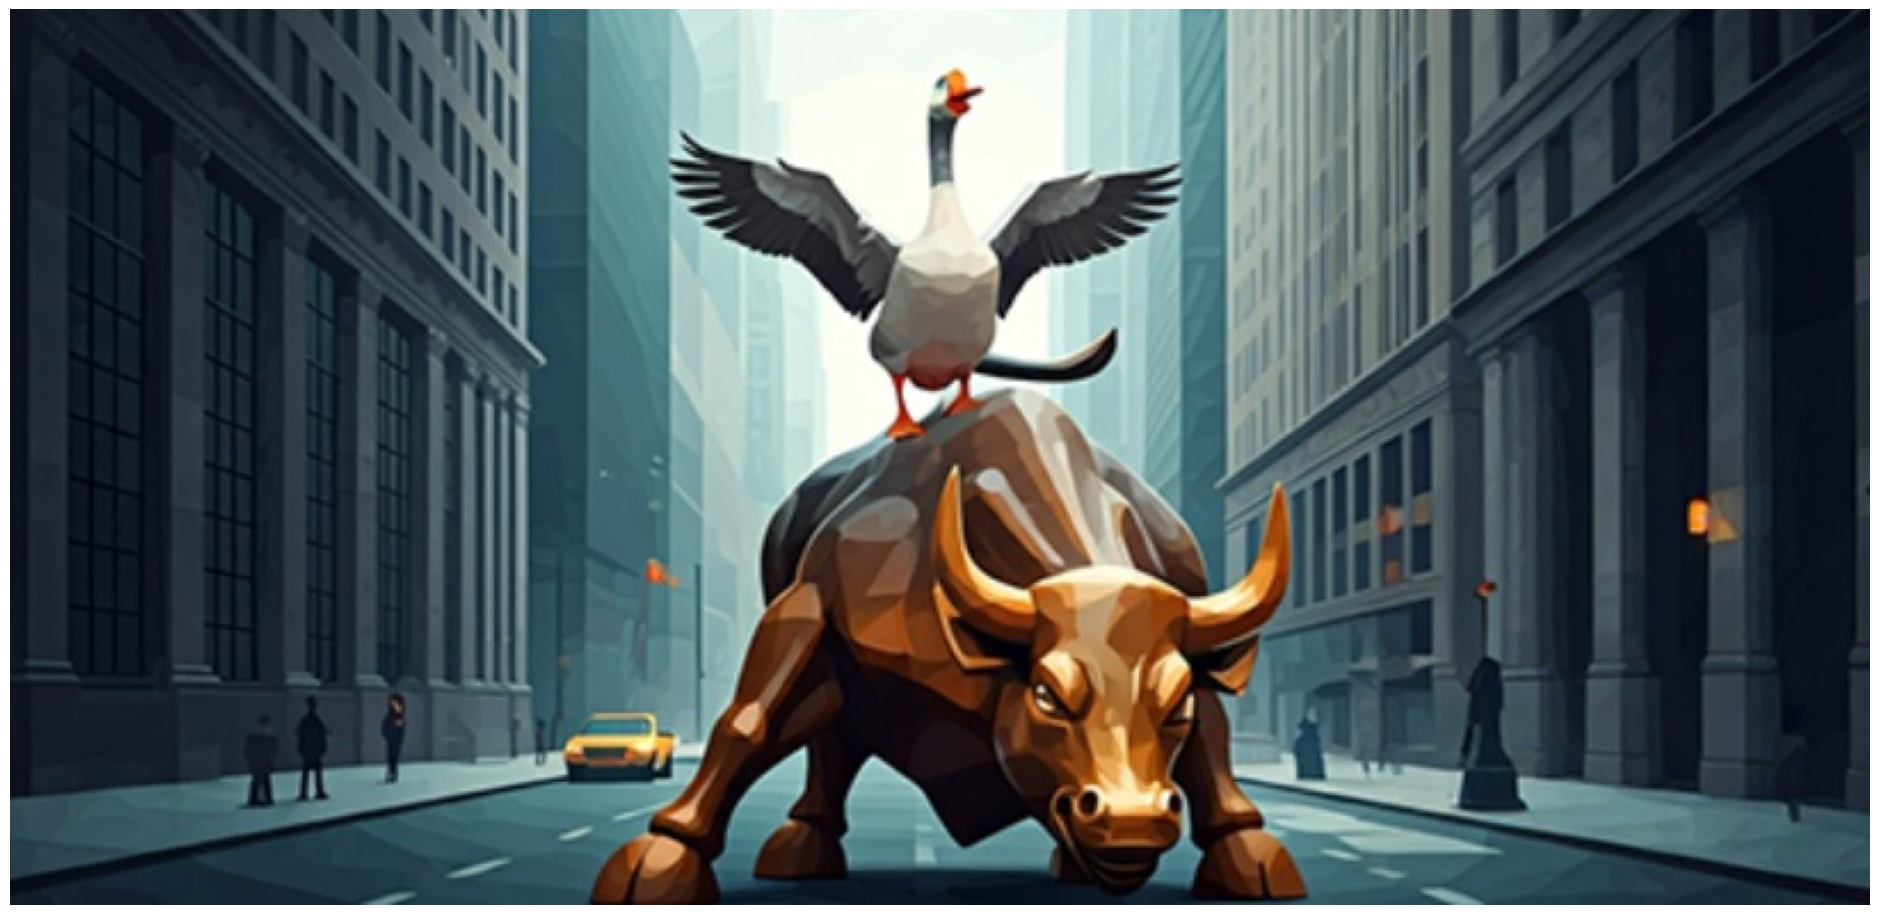

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = "/content/drive/MyDrive/Colab Notebooks/Проектный практикум/loan.jpg"
img = Image.open(image_path)
plt.figure(figsize=(24, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
# импорт библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
# загрузка датасетов
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Проектный практикум/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Проектный практикум/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Проектный практикум/sample_submission.csv')

Загрузили 3 датасета: обучающая выборка, тестовая выборка и целевой признак для тестовой выборки.

### Признаки

1   person_age (возраст заемщика)  

2   person_income (доход заемщика)  

3   person_home_ownership             
     (тип жилья: OWN/RENT/OTHER)

4   person_emp_length               
     (стаж работы в годах)

5   loan_intent (цель кредита)   

6   loan_grade (кредитный рейтинг)   

7   loan_amnt (сумма кредита)  

8   loan_int_rate (процентная ставка)

9   loan_percent_income             
     (платеж как % от дохода)

10  cb_person_default_on_file       
     (имелись ли дефолты: Y/N)
     
11  cb_person_cred_hist_length        
     (длина кредитной истории в годах)

# Провести предварительный анализ данных (без визуализации)

In [5]:
# просматриваем первые 5 строк обучающей выборки
train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [6]:
# просматриваем типы данных и наличие пропусков обучающей выборки
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [7]:
# просматриваем описательную статистику обучающей выборки
train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [8]:
# просматриваем первые 5 строк тестовой выборки
test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [9]:
# просматриваем типы данных и наличие пропусков тестовой выборки
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [10]:
# просматриваем описательную статистику тестовой выборки
test.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,39098.000000,39098.000000,3.909800e+04,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000
mean,78193.500000,27.566781,6.406046e+04,4.687068,9251.466188,10.661216,0.159573,5.830707
std,11286.764749,6.032761,3.795583e+04,3.868395,5576.254680,3.020220,0.091633,4.072157
min,58645.000000,20.000000,4.000000e+03,0.000000,700.000000,5.420000,0.000000,2.000000
25%,68419.250000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000
50%,78193.500000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000
75%,87967.750000,30.000000,7.588500e+04,7.000000,12000.000000,12.990000,0.210000,8.000000
max,97742.000000,94.000000,1.900000e+06,42.000000,35000.000000,22.110000,0.730000,30.000000


In [11]:
# просматриваем первые 5 строк целевого признака для тестовой выборки
sample_submission.head()

,id,loan_status
0,58645,0.5
1,58646,0.5
2,58647,0.5
3,58648,0.5
4,58649,0.5


In [12]:
# просматриваем типы данных и наличие пропусков целевого признака для тестовой выборки
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           39098 non-null  int64  
 1   loan_status  39098 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 611.0 KB


In [13]:
# просматриваем описательную статистику целевого признака для тестовой выборки
sample_submission.describe()

,id,loan_status
count,39098.000000,39098.0
mean,78193.500000,0.5
std,11286.764749,0.0
min,58645.000000,0.5
25%,68419.250000,0.5
50%,78193.500000,0.5
75%,87967.750000,0.5
max,97742.000000,0.5


# Выявить пропуски в данных

# Принять решение по обработке найденных пропусков

In [14]:
# выявить пропуски
missing_values = train.isnull().sum()
print("Пропущенные значения в каждом столбце датасета train:")
print(missing_values)
print(missing_values[missing_values > 0])
print('*' * 50)
missing_values = test.isnull().sum()
print("Пропущенные значения в каждом столбце датасета test:")
print(missing_values)
print(missing_values[missing_values > 0])

Пропущенные значения в каждом столбце датасета train:
id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64
Series([], dtype: int64)
**************************************************
Пропущенные значения в каждом столбце датасета test:
id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtyp

In [15]:
# Проверка на дубликаты
print("Количество дубликатов train:", train.duplicated().sum())
print("Количество дубликатов test:", test.duplicated().sum())
# Удаление дубликатов
# train = train.drop_duplicates()
# test = test.drop_duplicates()
# print("Размерность данных после очистки train:", train.shape)
# print("Размерность данных после очистки test:", test.shape)

Количество дубликатов train: 0
Количество дубликатов test: 0


Пропуски отсутствуют в обучающей и тестовой выборках. Таким образом нет никакой необходимости в их заполнении.

Дубликаты отсутствуют в обучающей и тестовой выборках.

# Исследовательский анализ

# Выбросы

Просмотрим выбросы во всех столбцах датасета с количественными данными. Заменим явнуе анамалии средними значениями по каждому признаку.

,person_age
count,58645.000000
mean,27.550857
std,6.033216
min,20.000000
25%,23.000000
50%,26.000000
75%,30.000000
max,123.000000


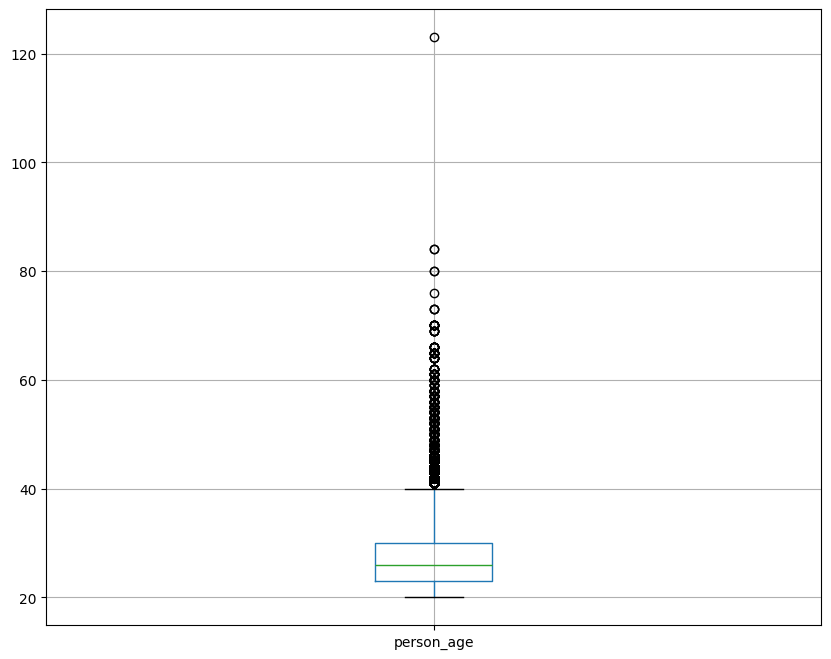

In [16]:
train.boxplot(column='person_age', figsize=(10,8))
train['person_age'].describe()

,person_income
count,5.864500e+04
mean,6.404617e+04
std,3.793111e+04
min,4.200000e+03
25%,4.200000e+04
50%,5.800000e+04
75%,7.560000e+04
max,1.900000e+06


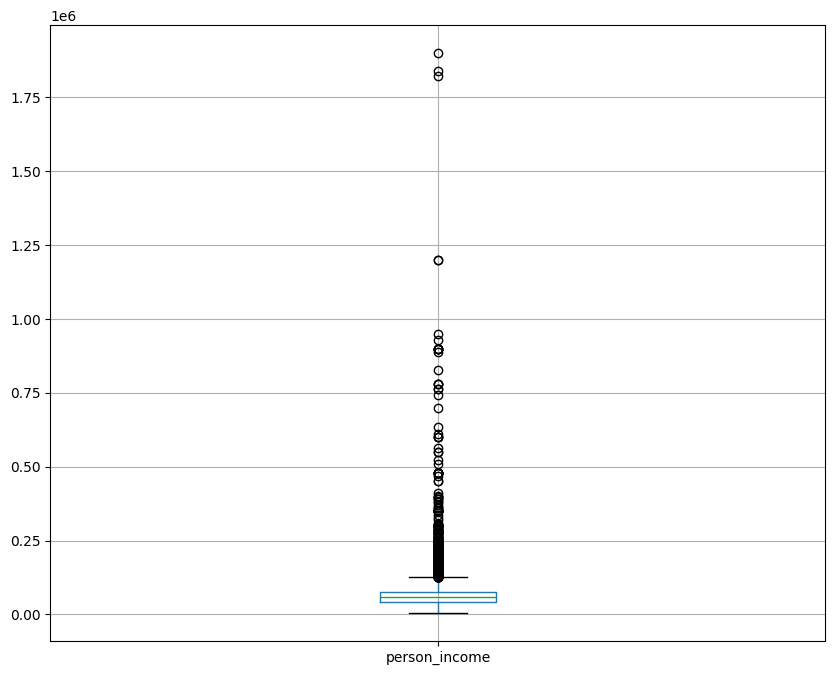

In [17]:
train.boxplot(column='person_income', figsize=(10,8))
train['person_income'].describe()

,person_emp_length
count,58645.000000
mean,4.701015
std,3.959784
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,123.000000


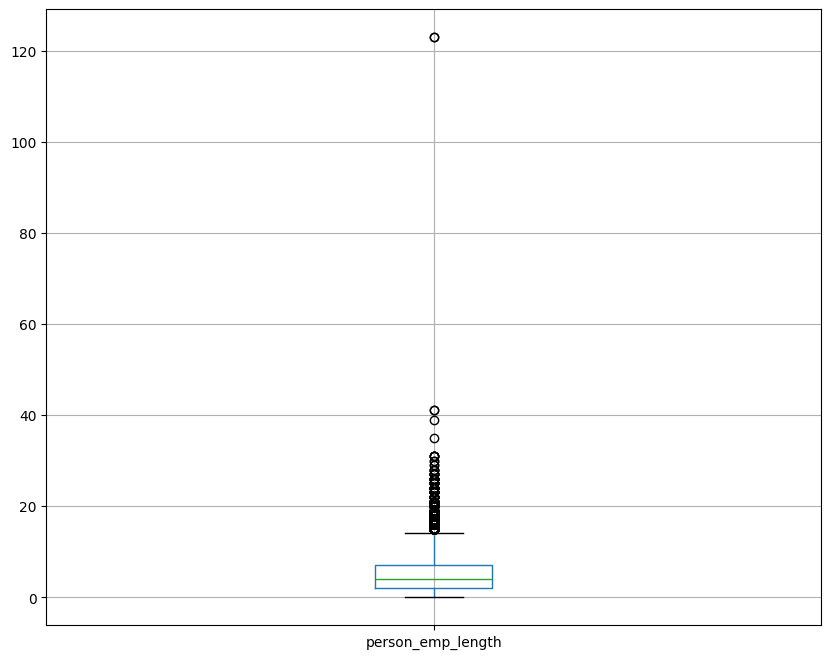

In [18]:
train.boxplot(column='person_emp_length', figsize=(10,8))
train['person_emp_length'].describe()

,loan_amnt
count,58645.000000
mean,9217.556518
std,5563.807384
min,500.000000
25%,5000.000000
50%,8000.000000
75%,12000.000000
max,35000.000000


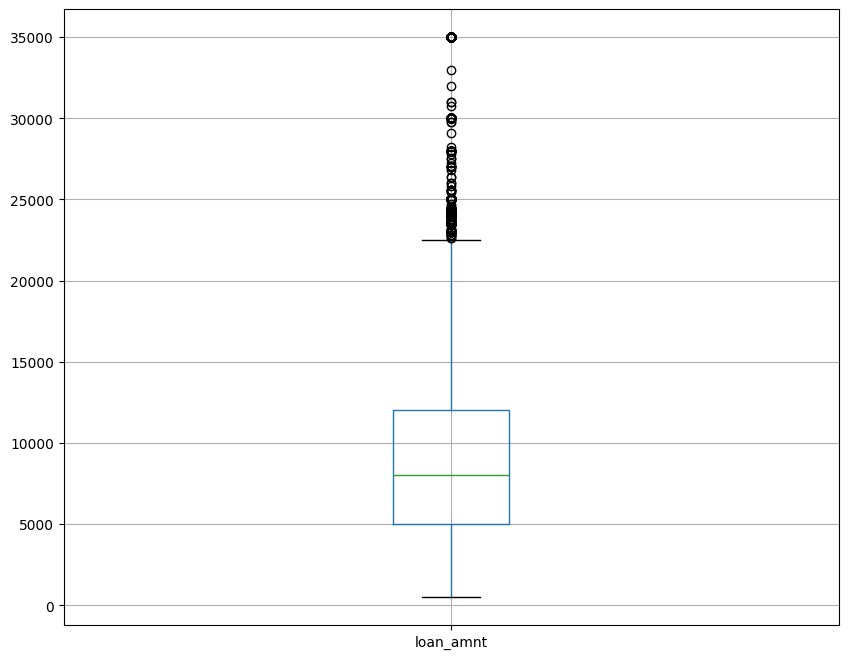

In [19]:
train.boxplot(column='loan_amnt', figsize=(10,8))
train['loan_amnt'].describe()

,loan_int_rate
count,58645.000000
mean,10.677874
std,3.034697
min,5.420000
25%,7.880000
50%,10.750000
75%,12.990000
max,23.220000


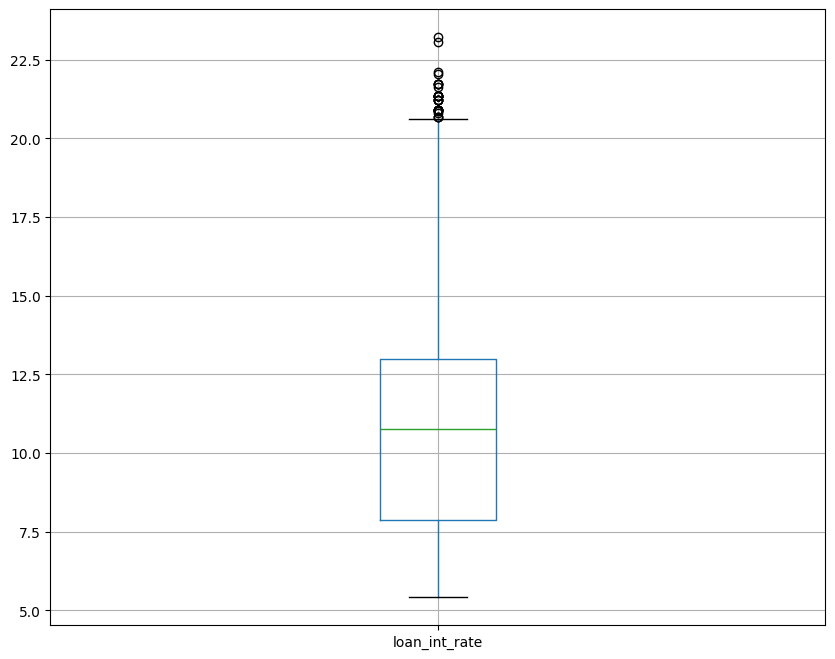

In [20]:
train.boxplot(column='loan_int_rate', figsize=(10,8))
train['loan_int_rate'].describe()

,loan_percent_income
count,58645.000000
mean,0.159238
std,0.091692
min,0.000000
25%,0.090000
50%,0.140000
75%,0.210000
max,0.830000


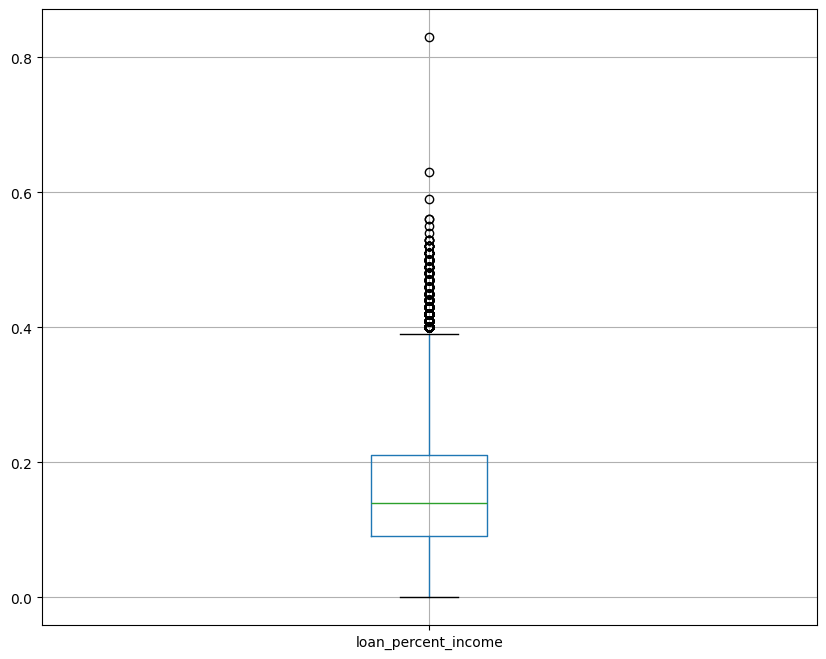

In [21]:
train.boxplot(column='loan_percent_income', figsize=(10,8))
train['loan_percent_income'].describe()

,cb_person_cred_hist_length
count,58645.000000
mean,5.813556
std,4.029196
min,2.000000
25%,3.000000
50%,4.000000
75%,8.000000
max,30.000000


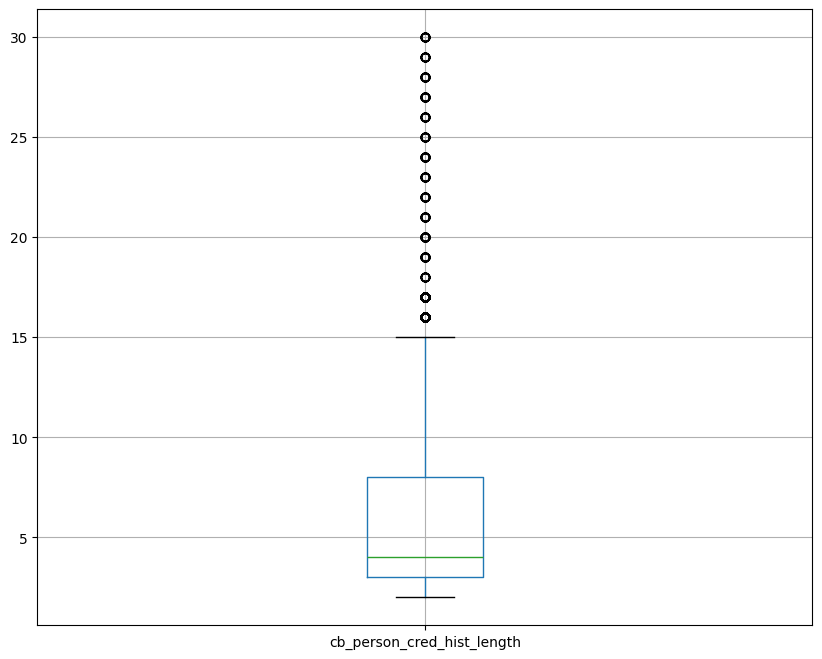

In [22]:
train.boxplot(column='cb_person_cred_hist_length', figsize=(10,8))
train['cb_person_cred_hist_length'].describe()

In [23]:
# уберем значимые аномолии
train.loc[(train['person_age'] > 100), 'person_age'] = train['person_age'].mean()

train.loc[(train['person_income'] > 100000), 'person_income'] = train['person_income'].mean()

train.loc[(train['person_emp_length'] > 20), 'person_emp_length'] = train['person_emp_length'].mean()

train.loc[(train['loan_amnt'] > 25000), 'loan_amnt'] = train['loan_amnt'].mean()

train.loc[(train['loan_int_rate'] > 22), 'loan_int_rate'] = train['loan_int_rate'].mean()

train.loc[(train['loan_percent_income'] > 0.6), 'loan_percent_income'] = train['loan_percent_income'].mean()

train.loc[(train['cb_person_cred_hist_length'] > 15), 'cb_person_cred_hist_length'] = train['cb_person_cred_hist_length'].mean()

<ipython-input-23-c2218046620a>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.550856850541393' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train.loc[(train['person_age'] > 100), 'person_age'] = train['person_age'].mean()
<ipython-input-23-c2218046620a>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '64046.17287066246' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train.loc[(train['person_income'] > 100000), 'person_income'] = train['person_income'].mean()
<ipython-input-23-c2218046620a>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9217.556518032228' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train.l

# Выявить категориальные признаки

# Преобразовать категориальные данные

In [24]:
# найти все признаки, в которых первое значение - строка
def find_cat(train, num_uniq=4):
    for name in train.columns:
        s = ''
        s += name
        if (type(train[name][0]) == str):
            s += ' строка,'
        if (train[name].nunique()<=num_uniq):
            s += ' мало уникальных'
        if (s!=name):
            print (s)

find_cat(train)

person_home_ownership строка, мало уникальных
loan_intent строка,
loan_grade строка,
cb_person_default_on_file строка, мало уникальных
loan_status мало уникальных


Следовательно, категориальные признаки:

- person_home_ownership

- loan_intent

- loan_grade

- cb_person_default_on_file

In [25]:
# One-hot-encoding: получение дамми-признаков
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [26]:
train.head()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,0,37.0,35000.0,0.0,6000.0,11.49,0.17,14.0,0,False,...,False,False,False,True,False,False,False,False,False,False
1,1,22.0,56000.0,6.0,4000.0,13.35,0.07,2.0,0,False,...,True,False,False,False,True,False,False,False,False,False
2,2,29.0,28800.0,8.0,6000.0,8.90,0.21,10.0,0,False,...,False,True,False,False,False,False,False,False,False,False
3,3,30.0,70000.0,14.0,12000.0,11.11,0.17,5.0,0,False,...,False,False,True,True,False,False,False,False,False,False
4,4,22.0,60000.0,2.0,6000.0,6.92,0.10,3.0,0,False,...,True,False,False,False,False,False,False,False,False,False


In [27]:
test.head()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,58645,23,69000,3.0,25000,15.76,0.36,2,False,False,...,False,False,False,False,False,False,False,True,False,False
1,58646,26,96000,6.0,10000,12.68,0.10,4,False,False,...,False,True,False,False,True,False,False,False,False,True
2,58647,26,30000,5.0,4000,17.19,0.13,2,False,False,...,False,False,True,False,False,False,True,False,False,True
3,58648,33,50000,4.0,7000,8.90,0.14,7,False,False,...,False,False,False,False,False,False,False,False,False,False
4,58649,26,102000,8.0,15000,16.32,0.15,4,False,False,...,False,False,False,False,False,True,False,False,False,True


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           58645 non-null  int64  
 1   person_age                   58645 non-null  float64
 2   person_income                58645 non-null  float64
 3   person_emp_length            58645 non-null  float64
 4   loan_amnt                    58645 non-null  float64
 5   loan_int_rate                58645 non-null  float64
 6   loan_percent_income          58645 non-null  float64
 7   cb_person_cred_hist_length   58645 non-null  float64
 8   loan_status                  58645 non-null  int64  
 9   person_home_ownership_OTHER  58645 non-null  bool   
 10  person_home_ownership_OWN    58645 non-null  bool   
 11  person_home_ownership_RENT   58645 non-null  bool   
 12  loan_intent_EDUCATION        58645 non-null  bool   
 13  loan_intent_HOME

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           39098 non-null  int64  
 1   person_age                   39098 non-null  int64  
 2   person_income                39098 non-null  int64  
 3   person_emp_length            39098 non-null  float64
 4   loan_amnt                    39098 non-null  int64  
 5   loan_int_rate                39098 non-null  float64
 6   loan_percent_income          39098 non-null  float64
 7   cb_person_cred_hist_length   39098 non-null  int64  
 8   person_home_ownership_OTHER  39098 non-null  bool   
 9   person_home_ownership_OWN    39098 non-null  bool   
 10  person_home_ownership_RENT   39098 non-null  bool   
 11  loan_intent_EDUCATION        39098 non-null  bool   
 12  loan_intent_HOMEIMPROVEMENT  39098 non-null  bool   
 13  loan_intent_MEDI

Преобразовали следующие категориальные признаки:

- person_home_ownership
(тип жилья: OWN/RENT/OTHER)

- loan_intent (цель кредита)

- loan_grade (кредитный рейтинг)

- cb_person_default_on_file
(имелись ли дефолты: Y/N)

Для преобразования использовали OrdinalEncoder

# Поиск корреляции между признаками

<Axes: >

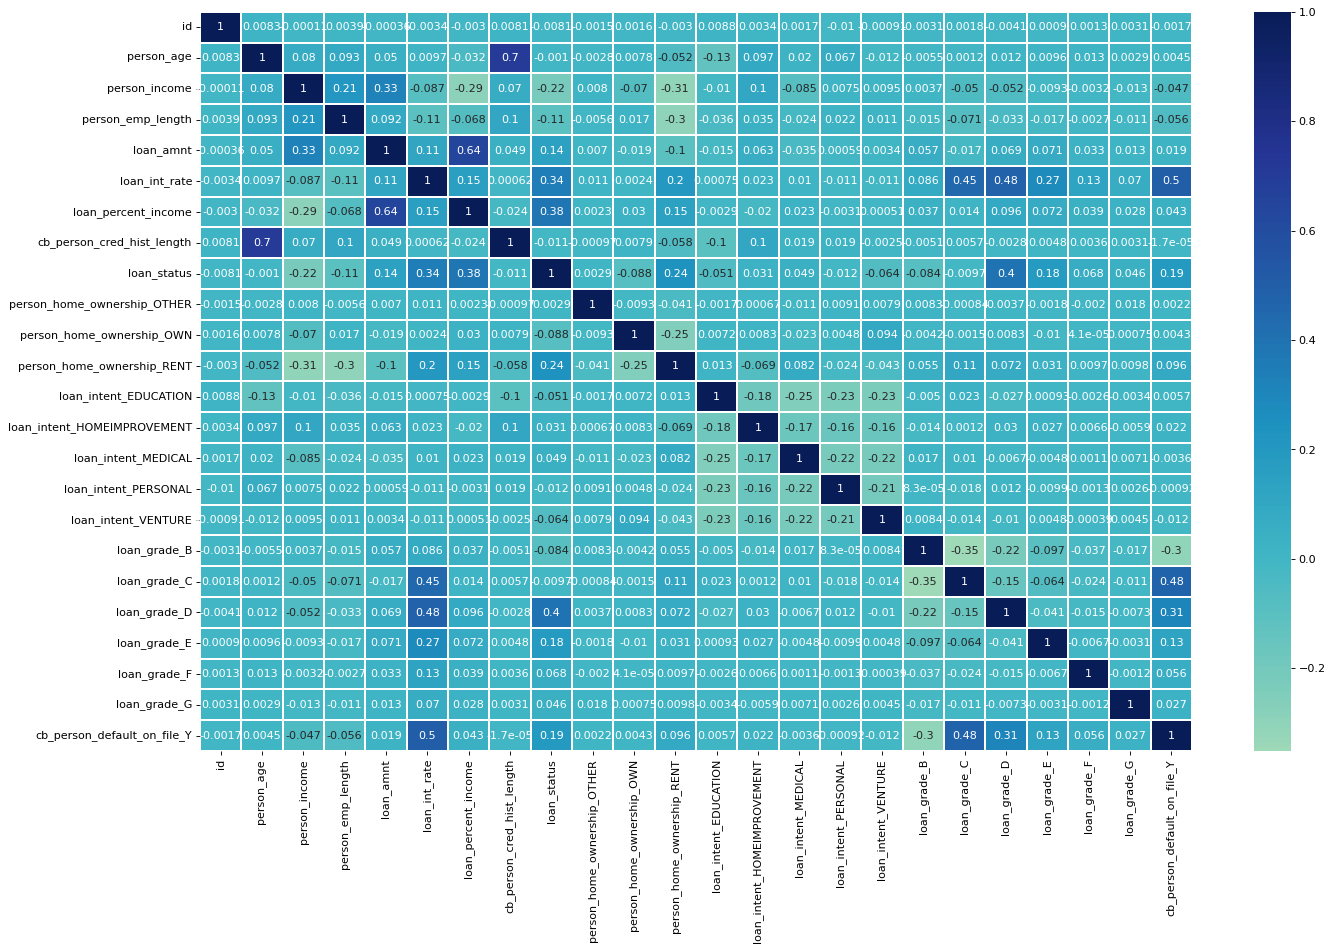

In [30]:
# Рассчитываем корреляцию между признаками и визуализируем
plt.figure(figsize=(20,12), dpi= 80)
sns.heatmap(train.corr(),  cmap='YlGnBu', center=0, annot=True, linewidths = 0.1)

In [31]:
# Строим матрицу корреляции
corr_matrix = train.corr()
print(corr_matrix)

                                   id  person_age  person_income  \
id                           1.000000    0.008339      -0.000106   
person_age                   0.008339    1.000000       0.079759   
person_income               -0.000106    0.079759       1.000000   
person_emp_length            0.003874    0.093015       0.206633   
loan_amnt                   -0.000361    0.050310       0.325327   
loan_int_rate               -0.003410    0.009667      -0.086706   
loan_percent_income         -0.002964   -0.032472      -0.292036   
cb_person_cred_hist_length   0.008073    0.701830       0.069587   
loan_status                 -0.008138   -0.001022      -0.220480   
person_home_ownership_OTHER -0.001452   -0.002829       0.008025   
person_home_ownership_OWN    0.001638    0.007810      -0.069529   
person_home_ownership_RENT  -0.003035   -0.051576      -0.306826   
loan_intent_EDUCATION        0.008843   -0.127388      -0.010256   
loan_intent_HOMEIMPROVEMENT  0.003434    0.09674

На основе представленной матрицы корреляции можно сделать следующие выводы о взаимосвязях между переменными:

### Сильные корреляции (|r| > 0.5)
Возраст и кредитная история:

person_age и cb_person_cred_hist_length: 0.70

Ожидаемая сильная связь - чем старше человек, тем длиннее его кредитная история

Доход и сумма займа:

person_income и loan_amnt: 0.33

Люди с более высоким доходом берут большие кредиты

Процентная ставка и дефолт:

loan_int_rate и cb_person_default_on_file_Y: 0.50

Клиентам с прошлыми дефолтами назначают более высокие ставки

Процентная ставка и кредитный рейтинг:

Сильная связь с градациями (grade C: 0.45, grade D: 0.48)

Чем хуже кредитный рейтинг, тем выше процентная ставка

### Умеренные корреляции (0.3 < |r| < 0.5)
Статус займа (дефолт):

Положительная связь с процентной ставкой (0.34)

Положительная связь с loan_percent_income (0.38)

Положительная связь с grade D (0.40)

Положительная связь с арендой жилья (0.24)

Аренда жилья:

Отрицательная связь с доходом (-0.31)

Положительная связь с процентной ставкой (0.20)

### Слабые корреляции (|r| < 0.3)
Большинство других связей слабые, но некоторые примечательные:

Отрицательная связь между владением жильем (OWN) и статусом займа (-0.09)

Положительная связь между целью кредита "медицина" и статусом займа (0.05)


# Нормировать данные выбранным методом

In [32]:
scaler = StandardScaler()
numeric = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
scaler.fit_transform(train[numeric])
train[numeric] = scaler.transform(train[numeric])

scaler.fit_transform(test[numeric])
test[numeric] = scaler.transform(test[numeric])

In [33]:
train.head()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,0,1.569824,-1.155451,-1.233761,-0.584146,0.268026,0.117670,2.675674,0,False,...,False,False,False,True,False,False,False,False,False,False
1,1,-0.921757,-0.039861,0.360327,-0.963129,0.881266,-0.973693,-1.053790,0,False,...,True,False,False,False,True,False,False,False,False,False
2,2,0.240981,-1.484815,0.891690,-0.584146,-0.585896,0.554215,1.432519,0,False,...,False,True,False,False,False,False,False,False,False,False
3,3,0.407086,0.703865,2.485778,0.552801,0.142740,0.117670,-0.121424,0,False,...,False,False,True,True,False,False,False,False,False,False
4,4,-0.921757,0.172632,-0.702398,-0.584146,-1.238700,-0.646284,-0.743002,0,False,...,True,False,False,False,False,False,False,False,False,False


In [34]:
test.head()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,58645,-0.757007,0.130141,-0.436121,2.824250,1.688238,2.187295,-0.940719,False,False,...,False,False,False,False,False,False,False,True,False,False
1,58646,-0.259715,0.841503,0.339404,0.134238,0.668431,-0.650135,-0.449573,False,False,...,False,True,False,False,True,False,False,False,False,True
2,58647,-0.259715,-0.897382,0.080895,-0.941767,2.161719,-0.322739,-0.940719,False,False,...,False,False,True,False,False,False,True,False,False,True
3,58648,0.900631,-0.370447,-0.177613,-0.403765,-0.583149,-0.213607,0.287147,False,False,...,False,False,False,False,False,False,False,False,False,False
4,58649,-0.259715,0.999584,0.856421,1.030908,1.873657,-0.104475,-0.449573,False,False,...,False,False,False,False,False,True,False,False,False,True


Масштабирование использовали для количественных данных:
numeric = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

при помощи StandardScaler()

Признаки:

- person_age (возраст заемщика)

- person_income (доход заемщика)

- person_emp_length
(стаж работы в годах)

- loan_amnt (сумма кредита)

- loan_int_rate (процентная ставка)

- loan_percent_income
(платеж как % от дохода)

- cb_person_cred_hist_length
(длина кредитной истории в годах)

# Разделение данных на признаки (X) и целевую переменную (y)

In [35]:
# Разделение данных на признаки (X) и целевую переменную (y)
X_train = train.drop('loan_status', axis=1)  # Признаки
y_train = train['loan_status']  # Целевая переменная
X_test = test
y_test = sample_submission['loan_status']

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (58645, 23)
y_train: (58645,)
X_test: (39098, 23)
y_test: (39098,)
